In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import time

In [4]:
# Step 1: Load dataset
df = pd.read_csv("segmentation_data.csv") 

# Step 2: Preprocess
df = df.dropna()

scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('ID', axis=1))

K=2, Time=0.3032s, Inertia=1028.5516605181772


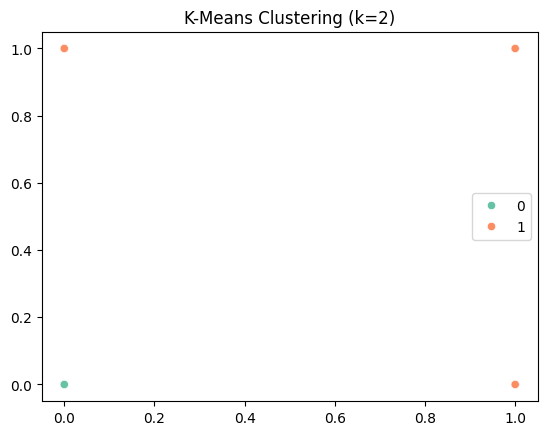

K=3, Time=0.0043s, Inertia=823.3893152141336


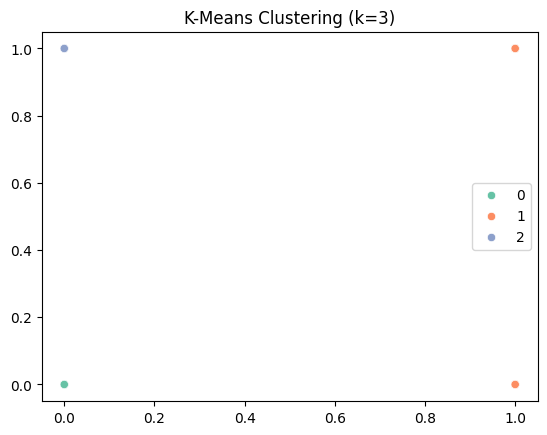

K=4, Time=0.0084s, Inertia=663.7508946956317


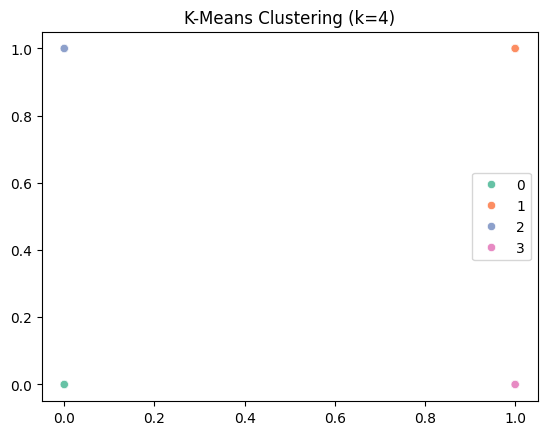

In [5]:
# Step 3: K-Means clustering
for k in [2, 3, 4]:
    start = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    end = time.time()
    print(f"K={k}, Time={end-start:.4f}s, Inertia={kmeans.inertia_}")
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette="Set2")
    plt.title(f"K-Means Clustering (k={k})")
    plt.show()

Agglomerative Time=0.1220s


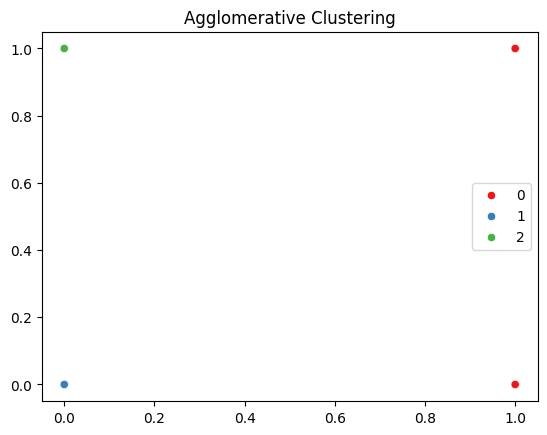

In [6]:
# Step 4: Agglomerative clustering
start = time.time()
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X)
end = time.time()
print(f"Agglomerative Time={end-start:.4f}s")

sns.scatterplot(x=X[:,0], y=X[:,1], hue=agg_labels, palette="Set1")
plt.title("Agglomerative Clustering")
plt.show()

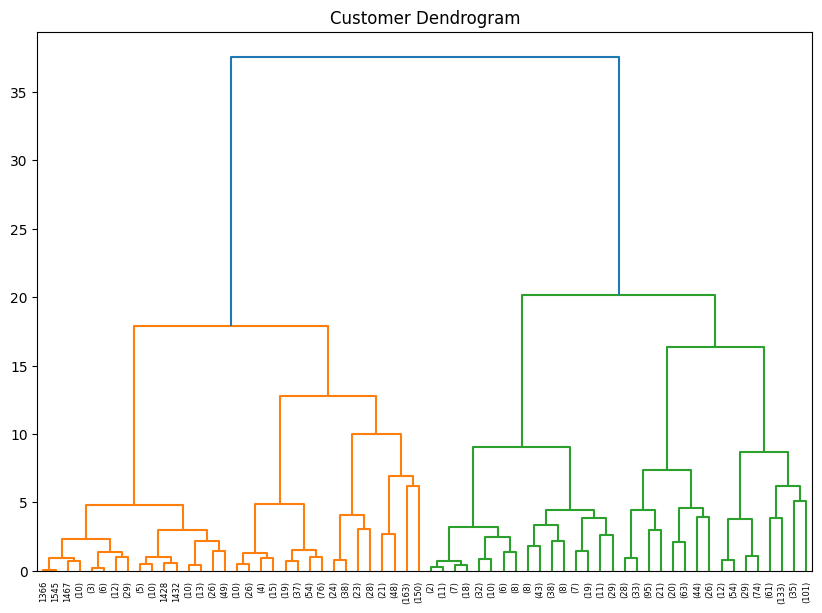

In [7]:
# Step 5: Dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Customer Dendrogram")
plt.show()